# GROUP: [A fOr SuRe](https://docs.google.com/spreadsheets/d/1tf6YIkZtTlGGrXT1MQMa0j_MoyZK_jYB0-4Up31NUzc/edit#gid=0&range=A16:F26)
  
| | Full Name  | Student ID    | Mức độ hoàn thành |
|---:|:-------------|:-----------|---|
| 1 | Nguyen Dang Khoa  | 2115113125       | 100%|
| 2 | Truong Thanh Trung  | 2111113300    | 100%|
| 3 | Nguyen Thanh Tan  | 2114113135    | 100%|
| 4 | Huynh Cong Danh  | 2114113017    | 100%|
| 5 | Le Thi Ngoc Han  | 2114113037    | 100%|
| 6 | Bui Anh Thu  | 2114113158    | 100%|
| 7 | Ho Thi Binh An  | 2114113003    | 100%|
| 8 | Tran Kim Ngan  | 2114113091   | 100%|
| 9 | Le Van Quang  | 2114113129    | 100%|
| 10 | Trinh Minh Truc  | 2114113167   | 100%|
| 11 | Vo Nguyen Kieu Diem  | 2114113018    | 100%|

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.

**NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way!**

We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://www.youtube.com/watch?v=WLnV_M2kt5A) all the way to early 2016.

## The Imports

In [1]:
import os
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
sns.set_style('whitegrid')
import cufflinks
import chart_studio
import chart_studio.tools as tls
chart_studio.tools.set_credentials_file(username='khoadangnguyen1810',
                                        api_key='djHh5Rpz9wC2YuyyZhWD')
import warnings
warnings.filterwarnings('ignore')

## Data
We need to get data using pandas datareader. We will get stock information for the following banks:

-  Bank of America

- CitiGroup

- Goldman Sachs

- JPMorgan Chase

- Morgan Stanley

- Wells Fargo

**1. Create a list of the ticker symbols (as strings) in alphabetical order.**

In [2]:
bank_ticker = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [3]:
#Bank of America
BAC = pdr.get_data_tiingo('BAC', start='2006-01-01', end='2016-01-01',
                          api_key='55aa5d43f48dfc9f241463896b8dc6d96b68284f')
BAC.drop(['adjClose','adjHigh','adjLow','adjOpen',
          'adjVolume','divCash','splitFactor'], axis =1, inplace = True)
BAC.reset_index(inplace=True)
BAC.drop('symbol', axis=1, inplace = True)
BAC.set_index('date', inplace = True)

In [4]:
#CitiGroup
C = pdr.get_data_tiingo('C', start='2006-01-01', end='2016-01-01',
                        api_key='55aa5d43f48dfc9f241463896b8dc6d96b68284f')
C.drop(['adjClose','adjHigh','adjLow','adjOpen',
        'adjVolume','divCash','splitFactor'], axis =1, inplace = True)
C.reset_index(inplace=True)
C.drop('symbol', axis=1, inplace = True)
C.set_index('date', inplace = True)

In [5]:
#Goldman Sachs
GS = pdr.get_data_tiingo('GS', start='2006-01-01', end='2016-01-01',
                         api_key='55aa5d43f48dfc9f241463896b8dc6d96b68284f')
GS.drop(['adjClose','adjHigh','adjLow','adjOpen',
         'adjVolume','divCash','splitFactor'], axis =1, inplace = True)
GS.reset_index(inplace=True)
GS.drop('symbol', axis=1, inplace = True)
GS.set_index('date', inplace = True)

In [6]:
#JPMorgan Chase
JPM = pdr.get_data_tiingo('JPM', start='2006-01-01', end='2016-01-01',
                          api_key='55aa5d43f48dfc9f241463896b8dc6d96b68284f')
JPM.drop(['adjClose','adjHigh','adjLow','adjOpen',
          'adjVolume','divCash','splitFactor'], axis =1, inplace = True)
JPM.reset_index(inplace=True)
JPM.drop('symbol', axis=1, inplace = True)
JPM.set_index('date', inplace=True)

In [7]:
#Morgan Stanley
MS = pdr.get_data_tiingo('MS', start='2006-01-01', end='2016-01-01',
                         api_key='55aa5d43f48dfc9f241463896b8dc6d96b68284f')
MS.drop(['adjClose','adjHigh','adjLow','adjOpen',
         'adjVolume','divCash','splitFactor'], axis =1, inplace = True)
MS.reset_index(inplace=True)
MS.drop('symbol', axis=1, inplace = True)
MS.set_index('date', inplace = True)

In [8]:
#Wells Fargo
WFC = pdr.get_data_tiingo('WFC', start='2006-01-01', end='2016-01-01',
                          api_key='55aa5d43f48dfc9f241463896b8dc6d96b68284f')
WFC.drop(['adjClose','adjHigh','adjLow','adjOpen',
          'adjVolume','divCash','splitFactor'], axis =1, inplace = True)
WFC.reset_index(inplace=True)
WFC.drop('symbol', axis=1, inplace = True)
WFC.set_index('date', inplace = True)

**2. Use pd.concat() to concatenate the bank dataframes together to a single data frame called bank_stocks.**

In [9]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=bank_ticker)

In [10]:
bank_stocks.columns.names = ['bank ticker','stock info']

**3. Check the head of the bank_stocks dataframe.**

In [11]:
bank_stocks.head()

bank ticker                  BAC                                     C         \
stock info                 close   high    low   open    volume  close   high   
date                                                                            
2006-01-03 00:00:00+00:00  47.08  47.18  46.15  46.92  16296700  49.29  49.38   
2006-01-04 00:00:00+00:00  46.58  47.24  46.45  47.00  17757900  48.38  49.10   
2006-01-05 00:00:00+00:00  46.64  46.83  46.32  46.58  14970700  48.62  48.78   
2006-01-06 00:00:00+00:00  46.57  46.91  46.35  46.80  12599800  48.62  48.90   
2006-01-09 00:00:00+00:00  46.60  46.97  46.36  46.72  15619400  48.39  48.74   

bank ticker                                        ...     MS                  \
stock info                   low   open    volume  ...  close   high      low   
date                                               ...                          
2006-01-03 00:00:00+00:00  48.11  49.00  15376000  ...  58.31  58.49  56.7400   
2006-01-04 00:00:00+00:00  48.35  48.86  18709000  ...  58.35  59.28  58.3500   
2006-01-05 00:00:00+00:00  48.40  48.44  11431000  ...  58.51  58.59  58.0200   
2006-01-06 00:00:00+00:00  48.20  48.88  13702000  ...  58.57  58.85  58.0500   
2006-01-09 00:00:00+00:00  48.30  48.60  16807000  ...  59.19  59.29  58.6244   

bank ticker                                  WFC                                
stock info                  open   volume  close   high    low   open   volume  
date                                                                            
2006-01-03 00:00:00+00:00  57.17  5377000  63.80  63.95  62.39  63.20  5508200  
2006-01-04 00:00:00+00:00  58.70  7977800  63.06  63.64  62.73  63.60  5435000  
2006-01-05 00:00:00+00:00  58.55  5778000  62.99  63.11  62.62  63.00  5079000  
2006-01-06 00:00:00+00:00  58.77  6889800  63.36  63.55  62.77  63.16  4201900  
2006-01-09 00:00:00+00:00  58.63  4144500  63.35  63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

**1 .What is the max Close price for each bank's stock throughout the time period?**

In [12]:
bank_stocks.xs(key='close',axis=1,level='stock info').max()

bank ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

**2. Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

**We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [13]:
returns = pd.DataFrame()
for x in bank_ticker:
    returns[x+' return']=bank_stocks[x]['close'].pct_change()
returns.head()

,BAC return,C return,GS return,JPM return,MS return,WFC return
date,,,,,,
2006-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04 00:00:00+00:00,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05 00:00:00+00:00,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06 00:00:00+00:00,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09 00:00:00+00:00,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


**3 .Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

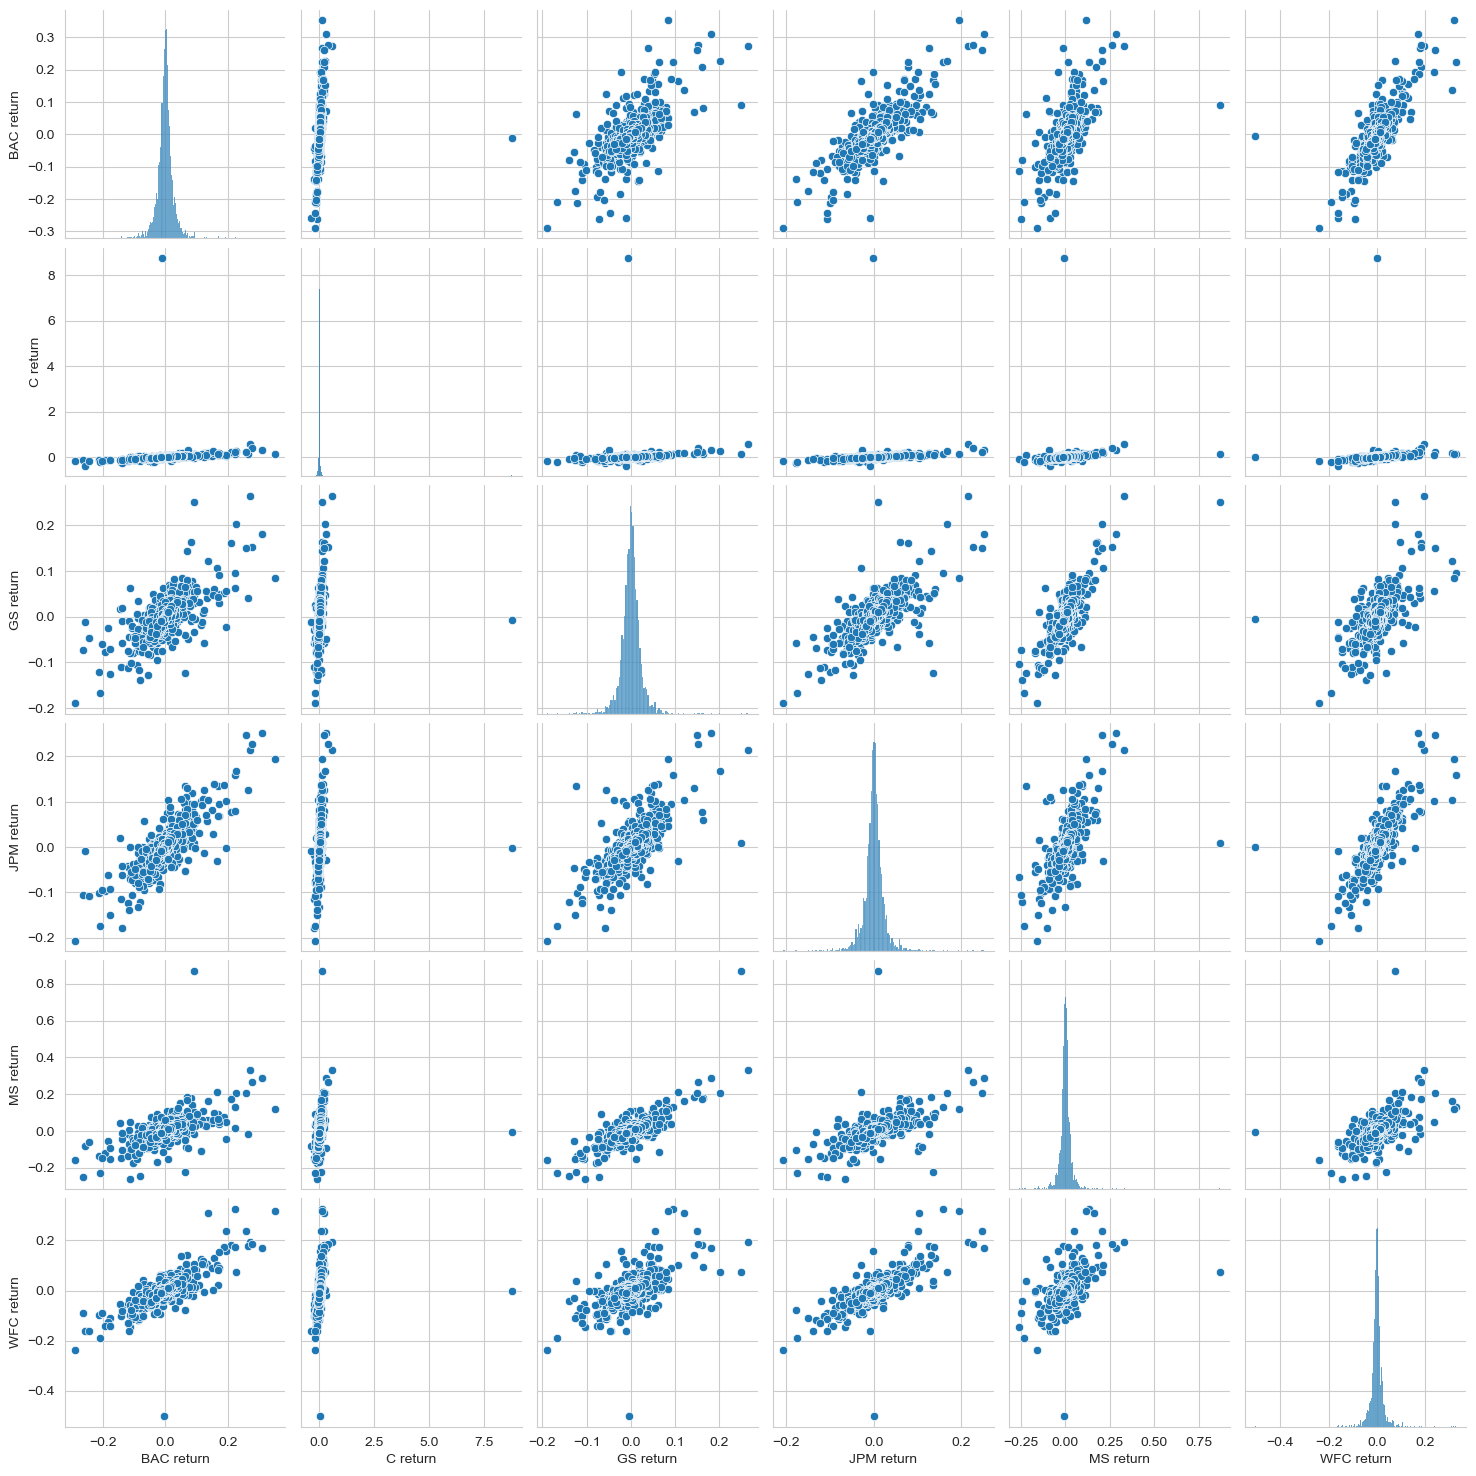

In [14]:
sns.pairplot(returns[1:])

We can see that stock C seems to stand out the most. Because it almost didn't correlate with any other stocks.

**3. Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [15]:
returns.idxmax()

BAC return   2009-04-09 00:00:00+00:00
C return     2011-05-09 00:00:00+00:00
GS return    2008-11-24 00:00:00+00:00
JPM return   2009-01-21 00:00:00+00:00
MS return    2008-10-13 00:00:00+00:00
WFC return   2008-07-16 00:00:00+00:00
dtype: datetime64[ns, UTC]

In [16]:
returns.idxmin()

BAC return   2009-01-20 00:00:00+00:00
C return     2009-02-27 00:00:00+00:00
GS return    2009-01-20 00:00:00+00:00
JPM return   2009-01-20 00:00:00+00:00
MS return    2008-10-09 00:00:00+00:00
WFC return   2006-08-14 00:00:00+00:00
dtype: datetime64[ns, UTC]

BAC, GS and JPM share the same day for the worst drop. On Jan 20 2009, there are some events:

- Barack Obama, inaugurated as the 44th President of the United States of America, becomes the United States' first African-American president. [Where Was the Dow Jones When Obama Took Office?](https://www.investopedia.com/ask/answers/101314/where-was-dow-jones-when-obama-took-office.asp)

>Before Obama took office, the stock market went through a severe recession due to the global financial crisis in 2008. During that time, the Dow Jones Industrial Average (DJIA) reached its lowest point at 7,949 points on March 9, 2009. The article emphasizes that the significant decline of the Dow Jones before Obama took office was not due to his policies or decisions but rather the economic issues he inherited when assuming the presidency. Investors and consumers worldwide were affected by the ongoing financial crisis and economic recession.

- The [subprime mortgage](https://en.wikipedia.org/wiki/Subprime_mortgage_crisis) crisis also had a mayor part in the decline of prices.

>The subprime mortgage crisis was a global financial crisis that occurred in the late 2000s and early 2010s. It originated from the US housing market, specifically the high-risk subprime mortgages. Financial institutions created complex financial products to distribute risk and attract investors. However, when the economic downturn hit, many borrowers were unable to repay their loans, leading to a collapse in the housing market and widespread financial instability. Governments and central banks had to intervene to stabilize the financial system, as banks and major institutions faced the risk of bankruptcy.

**4. You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anything significant happen in that time frame?**

In [17]:
bank_stocks['C'].loc['2007-01-01':'2015-01-01'].iplot(kind='candle')

For a brief period, the financial giant saw its stock trade below $1 per share, and even after many of its peers had fully recovered from the crisis, Citigroup did **a 1-for-10 reverse split in 2011** to get its stock price back into double digits.

>**A reverse stock split** is a measure taken by a public company to reduce its number of outstanding shares in the market. Existing shares are consolidated into fewer shares. This results in a higher stock price for the stock shares but has no immediate effect on the total value of the stock to the investor or the market capitalization of the stock. **For example**: if a stock is trading at 50 cents on the market, and the company declares a two-for-one reverse stock split, an investor who owned 100 shares worth 50 cents would own 50 shares worth $1 each.

**5. Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

BAC return    0.036628
C return      0.179066
GS return     0.025358
JPM return    0.027651
MS return     0.037821
WFC return    0.031838
dtype: float64


Text(0.5, 1.0, '2006 - 2016 Bank Stocks Returns Standard Deviation')

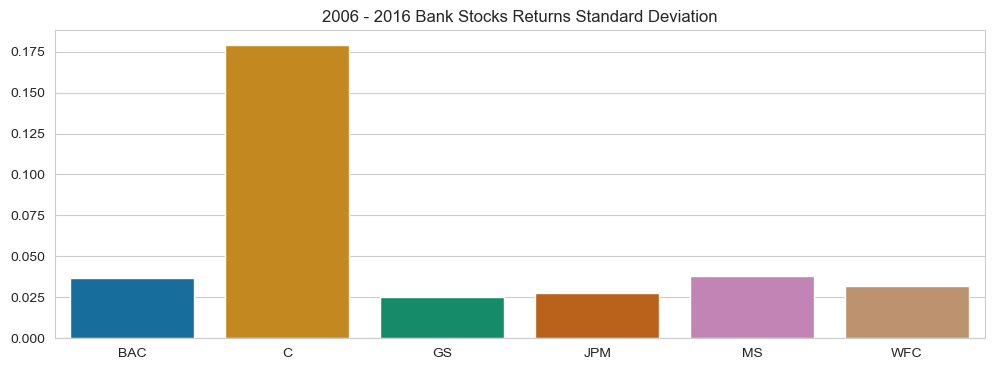

In [18]:
print(returns.std())
plt.figure(figsize=(12,4))
sns.barplot(x=bank_ticker,y=returns.std(), palette='colorblind')
plt.title('2006 - 2016 Bank Stocks Returns Standard Deviation')

**Through out the time period from 2006 to 2016, CitiGroup stock seems to be the riskiest to invest in (high standard deviation), because of the stock price experienced significant volatility during the years 2008-2012.**

- Citigroup's exposure to the subprime mortgage market and significant losses during the subprime mortgage crisis made its stock risky to invest in.

>The company held a large number of mortgage-backed securities and suffered substantial losses as the subprime mortgage crisis unfolded. This negatively impacted the company's financial position and investor confidence.

- Concerns about Citigroup's financial stability arose during the global financial crisis, as the company heavily relied on short-term funding and had exposure to risky assets.

>The company was heavily reliant on short-term funding and had significant exposure to risky assets. These factors contributed to doubts about the company's ability to weather the financial storm and raised concerns about its solvency.

- Regulatory scrutiny and legal challenges related to issues such as mortgage fraud and inadequate risk management practices increased the perceived riskiness of investing in Citigroup stock.

- The overall market volatility and uncertainty during the subprime mortgage crisis and global financial crisis created a turbulent environment for financial institutions, including Citigroup, making investors cautious and risk-averse.

BAC return    0.016152
C return      0.015282
GS return     0.014031
JPM return    0.014001
MS return     0.016219
WFC return    0.012585
dtype: float64


Text(0.5, 1.0, '2015 Bank Stocks Returns Standard Deviation')

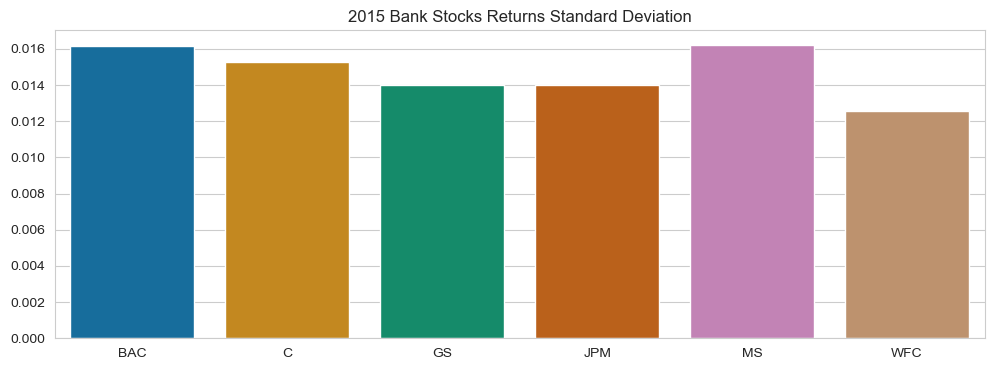

In [19]:
print(returns.loc['2014-12-31':'2016-01-01'].std())
plt.figure(figsize=(12,4))
sns.barplot(x=bank_ticker,y=returns.loc['2014-12-31':'2016-01-01'].std(),
            palette='colorblind')
plt.title('2015 Bank Stocks Returns Standard Deviation')

MS and BAC stock seem to be the riskiest for the year 2015. Because In 2015, the Federal Reserve (Fed) faced a crucial decision on **whether to increase interest rates. After the 2008 financial crisis, the Fed had maintained near-zero interest rates to stimulate the economy.** However, with the US economy recovering, there was a debate about tightening monetary policy. [**Eventually, the Fed decided to raise the key interest rate, marking the first increase in almost a decade.**](https://www.nytimes.com/2015/12/17/business/economy/fed-interest-rates.html) which affected not only to MS and BAC but also to all of other stocks.

**When banks raise their lending interest rates, there are several reasons why their stocks become less attractive to investors:**

- **Increased borrowing costs**: Higher interest rates result in increased borrowing costs for banks. This can impact the banks' profitability, reduce investment returns, and diminish the potential for shareholder profits.

- **Prolonged capital recovery time**: When interest rates rise, it takes longer to recover capital from loans. Long-term loans may become less appealing, which can affect the ability to generate profits for investors.

- **Competition with alternative investments**: When interest rates increase, alternative investments such as government bonds or the stock market may become more appealing to investors. Bank stocks may be perceived as less attractive compared to other investment options, reducing their appeal to investors.

**NOTE**: Although MS and BAC stocks were considered the riskiest in 2015, the standard deviations of all the given stocks were not significantly different. This implies that both MS and BAC stocks did not exhibit strong volatility.

**6 .Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

Text(0, 0.5, 'Numbers of Returns')

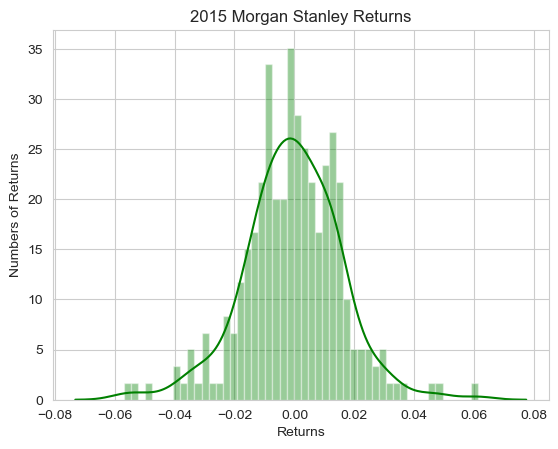

In [20]:
MS_return_2015 = returns[['MS return']].loc['2014-12-31':'2016-01-01']
sns.distplot(MS_return_2015, bins = 50, color ='g')
plt.title('2015 Morgan Stanley Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')

Based on the observed this distribution plot, it is evident that MS stock remains relatively stable with minimal volatility centered around the range -0.02 to 0.02.

**7. Create a distplot using seaborn of the 2008 returns for CitiGroup**

2015 CityGroup Stock Standard Deviation: 0.0153

2008 CityGroup Stock Standard Deviation: 0.1791


Text(0, 0.5, 'Numbers of Returns')

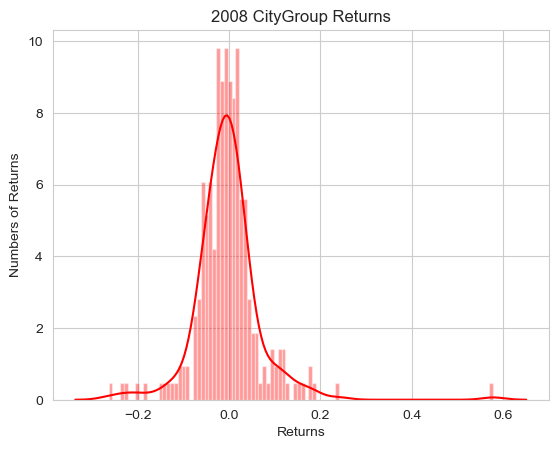

In [21]:
print('2015 CityGroup Stock Standard Deviation: ' + str(round(returns['C return'].loc['2014-12-31':'2016-01-01'].std(),4)))
print('')
print('2008 CityGroup Stock Standard Deviation: ' + str(round(returns['C return'].loc['2006-01-01':'2016-01-01'].std(),4)))

C_return_2008 = returns[['C return']].loc['2007-12-31':'2009-01-01']
sns.distplot(C_return_2008, bins = 100, color ='r')
plt.title('2008 CityGroup Returns')
plt.xlabel('Returns')
plt.ylabel('Numbers of Returns')

Based on the observed distribution plot, it is evident that **the standard deviation of C stock in 2008 is significantly larger and more spread out compared to 2015**. In 2008, the stock exhibits much higher volatility, with the standard deviation being **approximately 10 times larger** than in 2015.

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

**1 .Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

<Axes: xlabel='date'>

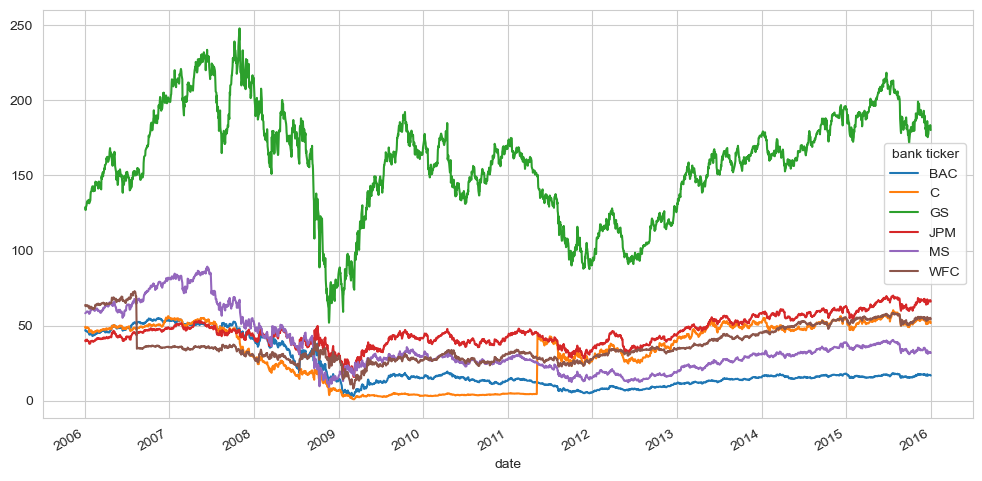

In [22]:
bank_stocks.xs(key='close', level = 'stock info', axis =1).plot(figsize=(12,6), kind='line')

By observing this line plot from 2006 to 2016, it is evident that **GS (Goldman Sachs) stock stands out from the other stocks**. **Firstly, the close price of GS stock consistently remains higher than the other stocks** throughout the period, indicating its strong performance and market position. **Secondly, GS stock demonstrates a rapid recovery from the financial crisis in 2008**, suggesting the bank's resilience and ability to navigate challenging economic conditions.

**1. Out-standing from the other stocks:** Goldman Sachs (GS) is distinguished from other banks and financial institutions for the following reasons:

- **[History and reputation](https://deliverypdf.ssrn.com/delivery.php?ID=222100088117002116067001109019103099028056019049035053126024080101127083102126007067102059037001108061038108091015127016010093006000058075009005125126013106078094112051006009013115096098125094082094004125075003005001011072072000101088096092120121064073&EXT=pdf&INDEX=TRUE)**: GS has a long-standing history and a strong reputation in the financial industry, making it a trusted and reputable institution globally.

- **Extensive network**: GS has a wide-ranging network of relationships across industries and countries, providing access to diverse business opportunities and collaborations.

- **Talented workforce**: GS attracts highly skilled and experienced professionals in the financial sector, enabling the company to leverage their expertise in innovative and analytical problem-solving.

- **Diversified business model**: GS's business model extends beyond traditional investment banking, encompassing asset management, advisory services, core trading, and more. This diversification enhances revenue streams and mitigates risks.

**2. Rapid recovery from the financial crisis in 2008:** GS demonstrated a relatively swift recovery and outperformed many competitors. Key factors contributing to GS's recovery include:

- **[Government bailout](https://abcnews.go.com/Business/story?id=7341888&page=1)**: GS received a 10 billion Dollars bailout loan through the TARP program, aiding their financial position and restructuring efforts.

- **[Transition to a commercial bank](https://www.nytimes.com/2008/09/22/business/22bank.html)**: GS shifted from an investment bank model to a commercial bank, accessing interbank funding and government support programs.

- **Business focus**: GS prioritized core activities like proprietary trading, asset management, and financial advisory services, while strengthening brokerage operations and distributing valuable securities.

- **Risk management and structural adjustments**: GS improved risk management, increased equity capital levels, and reduced financial leverage to enhance stability and resilience.

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

**Plot the rolling 20 day average against the Close Price for Bank Of America's stock for the year 2008**

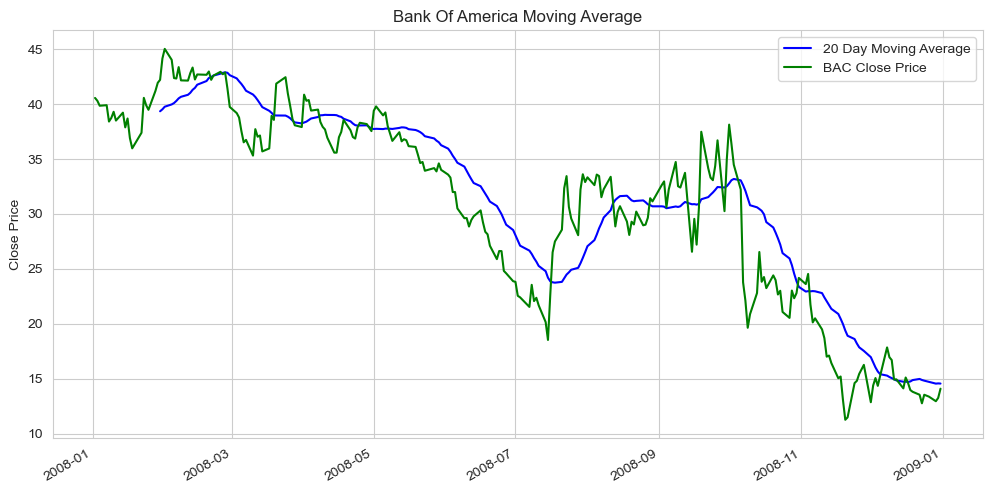

In [26]:
plt.figure(figsize=(12,6))
BAC['close'].loc['2008-01-01':'2008-12-31'].rolling(window=20).mean().plot(color='blue', label='20 Day Moving Average')
BAC['close'].loc['2008-01-01':'2008-12-31'].plot(color='green', label='BAC Close Price')
plt.ylabel('Close Price')
plt.xlabel('')
plt.title('Bank Of America Moving Average')
plt.legend()

Based on the observation of this plot, it can be concluded that the rolling 30-day average line plot of the close price provides **a useful tool for predicting and analyzing the close price trend**.

## Heatmap

**Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='bank ticker', ylabel='bank ticker'>

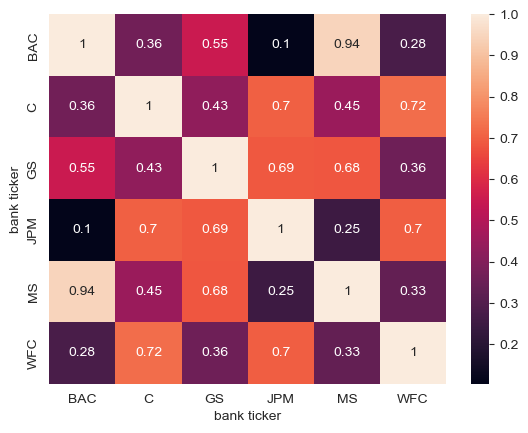

In [24]:
sns.heatmap(bank_stocks.xs(key='close', level='stock info', axis = 1).corr(), annot=True)

**Optional: Use seaborn's clustermap to cluster the correlations together:**

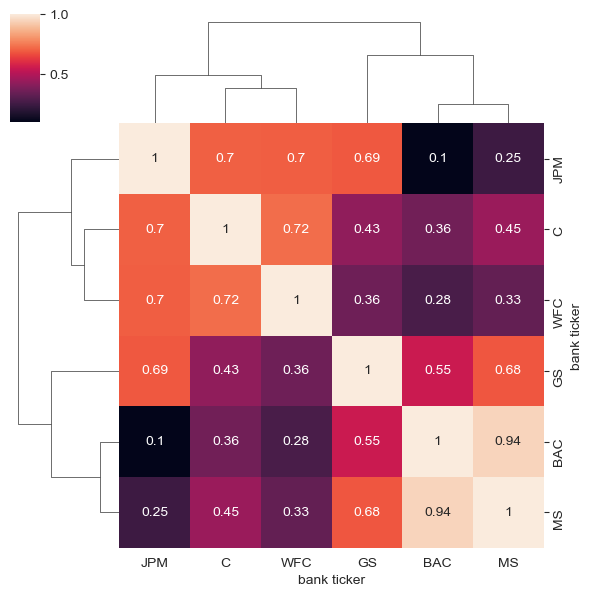

In [25]:
sns.clustermap(bank_stocks.xs(key='close', level='stock info', axis = 1).corr(), annot=True, figsize=(6,6))

By observing the clustermap chart, several conclusions can be drawn as follows:

- The close prices of C and WFC stocks show a strong correlation. These two stocks form a group that also correlates with the close price of JPM stock, forming Group 1.

- Similarly, the close prices of BAC and MS stocks exhibit a strong correlation. These two stocks form a group that also correlates with the close price of GS stock, forming Group 2.

- Group 1 and Group 2 show a correlation with each other.

----

**Note**:
In this part, A fOr SuRe team does not execute any analyses or provide any supportive information. We take this part as an additional part for introducing some financial charts such as Candlestick Charts and `.ta_plot()` for Simple Moving Averages and Bollinger Band.

# Financial Charts (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

`import cufflinks
import chart_studio
import chart_studio.tools as tls
chart_studio.tools.set_credentials_file(username='khoadangnguyen1810',
api_key='djHh5Rpz9wC2YuyyZhWD')`

## Candlestick
**Use** `.iplot(kind='candle')` **to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [26]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

## Simple Moving Averages
**Use** `.ta_plot(study='sma')` **to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [27]:
bank_stocks['MS'].loc['2014-12-31':'2016-01-01'].ta_plot(study='sma')

## Bollinger Band
**Use** `.ta_plot(study='boll')` **to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [28]:
bank_stocks['BAC'].loc['2014-12-31':'2016-01-01'].ta_plot(study='boll')

# Thank you for your reading!